# Assignment 1 **<font color="blue"> (15 points )<font>**

------
### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. Good luck!  
  

###   Answer each question in the designated cell. You may create additional cells as needed, but the output (answer) should be in each question's designated cell as marked. For written comments and answers, please add them in a text cell. 
### <font color="blue"> 1.5 points will be awarded for clean and clear code, and generating outputs in the designated cells.    
</font>

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## Question 1 <font color="blue">(4 points)</font>

  1. **<font color="blue">(2 points)</font>** Write a Python **function** that takes two **positive integers** and returns their **greatest common divisor**. In case you pass a negative integer to the function it must return the following string **in red**: <br> <font color="red"> "This function takes only positive integers!" </font>
  2. **<font color="blue">(2 points)</font>** Write a function that prints all the prime numbers less than or equal to $n$, where $n$ is a parameter to be passed to the function. If $n \leq 1$ the function returns <br>
<font color="red">"No prime number was found!"</span>.

For Question 1, we will use Euclidean algorithm which states difference of the two numbers a and b is replaced by the remainder of the Euclidean division (the modulo) of a by b. So we replace a by b and replace b by (a mod b) until b is 0 and a will be the greatest common denominator.

https://en.wikipedia.org/wiki/Euclidean_algorithm#Euclidean_division

In [2]:
# Code for Q1.1 - using Euclidean Algorithm
def greatest_common_divisor(a,b):
  if a < 0 or b < 0:
    return print(bcolors.RED + "This function takes only positive integers!" + bcolors.ENDC)
  else:
    while b != 0:
      a, b = b, a%b
    return a


In [10]:
greatest_common_divisor(14,32)

2

For Question 1.2 we use a nested loop to loop through every number and check if it is prime or not, and print the number in question if it is prime.

In [7]:
# Code for Q1.2 - nested loop to check all numbers within selected number n
def all_primes(n):
  if n <= 1:
    return print(bcolors.RED + "No prime number was found!" + bcolors.ENDC)
  else:
    for num in range(2,n+1):
      for j in range(2,num):
        if num%j==0:
          break
      else:
        print(num)
    return



In [11]:
all_primes(13)

2
3
5
7
11
13


## Question 2 <font color="blue">(10.5 points)</font>
Let $\mathbf X\sim \mbox{Exp}(\lambda)$, with parameter $\lambda = 1.2$.
  1. **<font color="blue">(1.5 points)</font>** Define the population mean and the sample mean. What is the population mean of the above described distribution. 
  2. **<font color="blue">(2 point)</font>**  Generate $100$ different samples of $\mathbf X$, namely, $S_{100}, S_{200}, S_{300}, \dots, S_{10000}$, where indeces denote the number of observations (sample size) in each sample. 
  3. **<font color="blue">(2 points)</font> Estimate** the population mean using each sample and explain the rationale behind your estimation. 
  4. **<font color="blue">(2 point)</font>** Applying **appropriate** methods visualize and describe the values obtained in the previous step. 
  5. **<font color="blue">(3 points)</font>** Finally, draw an inference about the population mean and its relation with sample means, based on visualized results in step 4.

For question 2.1 the population mean for an exponential distribution with λ=1.2 is **μ = 1/λ = 1/1.2 = 5/6 or 0.8333** . The sample mean would be a good estimate of the population mean if there are enough samples drawn.

In [8]:
# Code for Q2.1
# see response in text box above as no code is required to define the mean

For Question 2.2 - I will create a dictionary where every key contains the amount of samples of the values pair in a similar fashion to the question. samples[100]: np.random.exponential(1/1.2,100), samples[200]=np.random.exponential(1/1.2,200) ... this will allow us to reference the samples based on the amount in each sample.

In [9]:
# Code for Q2.2 - will call param = 1/lambda since lambda is a function in python.
import numpy as np

samples = {}
param = 1/1.2

for size in range(100,10100,100):
  samples[size]=np.random.exponential(param,size)

In [13]:
samples[2000]
samples[2000].shape

array([0.73942364, 0.336246  , 0.42096357, ..., 0.81216577, 0.46487304,
       0.96393   ])

(2000,)

In Question 2.3 we will take the mean of each generated samples from question Q2.2. As we increase the number of samples drawn we get closer to the population mean. sample_means is the mean of each generated sample from Q2.2, and running_mean is the running mean of the sample_means as we increase we continue to calculate the means of the generated sample_means. **The running_mean values will tend towards the population mean of μ = 1/λ = 1/1.2 = 5/6 or 0.8333** more quickly but the sample_means will do the same as more samples are drawn. **This method is using the central limit theorem to estimate the population mean.**

In [15]:
# Code for Q2.3
sample_means = np.empty(len(samples))
for i,size in enumerate(range(100,10100,100)):
  sample_means[i]=np.mean(samples[size])

running_mean = np.empty(len(sample_means))
for j in range(1,len(sample_means)):
  running_mean[j] = np.mean(sample_means[:j])

print(running_mean[-1])

0.8325479863693072


In Question 2.4 shown below is a plot with both the sample_means and running_mean (from the previous question Q2.3) values shown in a lineplot. As shown below it is clear that the means (more clearly in running_mean as the means are continuously calculated) tend towards the population mean μ = 1/λ = 1/1.2 = 5/6 or 0.8333

[Text(0, 0.5, 'Sampling Avergage'), Text(0.5, 0, 'Number of Means')]

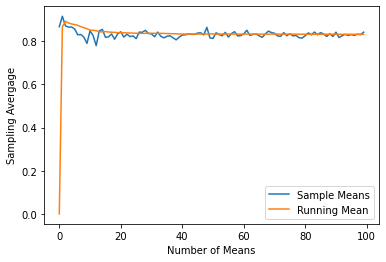

In [19]:
# Code for Q2.4
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
ax.plot(sample_means)
ax.plot(running_mean)
ax.set(xlabel='Number of Means',ylabel='Sampling Avergage')
ax.legend(["Sample Means","Running Mean"])
plt.show()

In [20]:
# Code for Q2.5 - Question answered in text box below as code is not required

For question 2.5, The population mean for an exponential distribution with λ = 1.2 is equal to μ = 1/λ = 1/1.2 = 5/6 or 0.8333. When looking at the plotted means of sample_means & running_mean in question 2.4 **we can see that the central limit theorem of these generated samples tend towards the population mean of μ = 1/λ = 1/1.2.**

## Question 3 <font color="blue">(14 points)</font>
In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to fix the seed to $111$ prior to
starting.
  
  1. **<font color="blue">(1 point)</font>** Create a vector `x` containing $100$ observations drawn from a $\mathcal{N}(0, 1)$ distribution as your feature. 
  2. **<font color="blue">(1 point)</font>** Create a vector, `eps` (for $\epsilon$), containing $100$ observations drawn from a $\mathcal{N}(0, 0.25)$. 
  3. **<font color="blue">(1 point)</font>** Using `x` and `eps` generate a vector `y` according to the model $y = −1 + 0.5x + \epsilon$.
  4. **<font color="blue">(2 points)</font>** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.
  5. **<font color="blue">(3 points)</font>** Fit a least squares linear model to predict `y` using `x` . Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?
  6. **<font color="blue">(2 point)</font>** Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color. Create an appropriate legend.
  7. **<font color="blue">(4 points)</font>** Explain how the result would change if you generate the data with less noise and repeat all steps 1 to 6? What about more noise? (Repeat experiments to support your answer)

In [21]:
# create a random seed base 111
np.random.seed(111)

In [22]:
# Code for Q3.1
x = np.random.normal(0,1,100)


In [23]:
# Code for Q3.2
eps = np.random.normal(0,0.25,100)


In [24]:
# Code for Q3.3
y = -1 + 0.5*x + eps

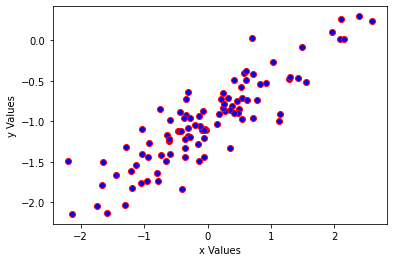

In [26]:
# Code for Q3.4
fig,ax = plt.subplots()
_ = ax.plot(x,y,'or', mfc='b')
_ = ax.set_xlabel("x Values")
_ = ax.set_ylabel("y Values")
plt.show()

For the above scatterplot there is a clear correlation between the x and y values with a few outliers.

In [27]:
# Reshape the x and y arrays so we could fit them to the Linear Regression Model in the following question 
x2 = x.reshape(-1,1)
y2 = y.reshape(-1,1)

In [28]:
# Code for Q3.5 - fit x and y to the Linear Regression Model that we instantiate 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x2,y2)

beta0_est = lr.intercept_
beta1_est = lr.coef_
print("\nR squared score: {}".format(lr.score(x2,y2)))
print("Beta_0 estimated: {}, Beta_1 estimated: {}".format(beta0_est,beta1_est))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R squared score: 0.7865985847643524
Beta_0 estimated: [-0.99156206], Beta_1 estimated: [[0.48035763]]


From the above Beta_0 and Beta_1 estimates are very close to the actual values of -1 and 0.5 respectively. The estimates are very good approximation of the population distribution

In [29]:
# Code for Q3.6 - create x-axis values and predicted y-values and reshapen the y array to match the x-axis array for plotting.
x_axis = np.linspace(-3,3)
y_pred = beta0_est+beta1_est*x_axis
y_pred2 = y_pred.reshape(x_axis.shape)


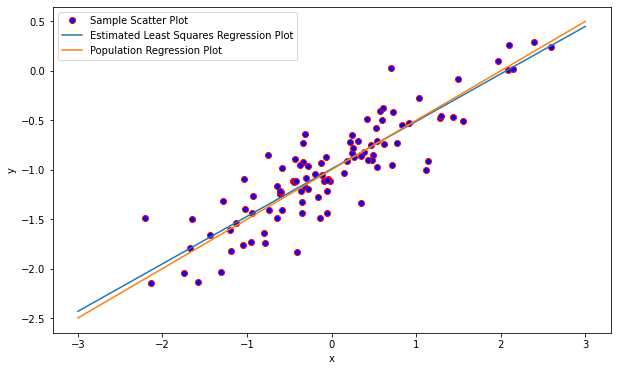

In [30]:
fig,ax = plt.subplots(figsize=(10,6))
_ = ax.plot(x,y,'or', mfc='b')
_ = ax.set_xlabel("x")
_ = ax.set_ylabel("y")
_ = ax.plot(x_axis,y_pred2)
_ = ax.plot(x_axis,-1+0.5*x_axis)
ax.legend(["Sample Scatter Plot","Estimated Least Squares Regression Plot","Population Regression Plot"],loc="upper left")
plt.show()

In [31]:
# Code for Q3.7

For question 3.7 the higher variance error there will likely be a higher difference between the predicted regression line and the population regression line and for a lower variance error the regression lines will be closer together as there would be less error.

In [32]:
# question 3.7b lower variance error of 0.025
x_b = np.random.normal(0,1,100)
eps_b = np.random.normal(0,0.025,100)
y_b = -1 + 0.5*x_b + eps_b

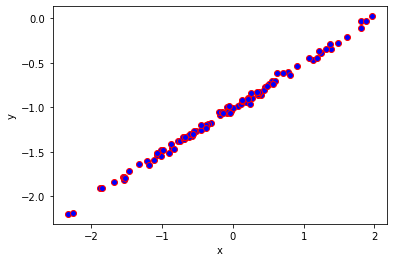

In [33]:
fig,ax = plt.subplots()
_b = ax.plot(x_b,y_b,'or', mfc='b')
_b = ax.set_xlabel("x")
_b = ax.set_ylabel("y")
plt.show()

There is a mich higher correlation visually in the above scatter plot as the error variance is much lower. We expect to see a very high R^2 value.

In [34]:
# Reshape the x and y arrays so we could fit them to the Linear Regression Model in the following question
x2_b = x_b.reshape(-1,1)
y2_b = y_b.reshape(-1,1)

In [35]:
# fit x and y to the Linear Regression Model that we instantiate 
from sklearn.linear_model import LinearRegression

lr_b = LinearRegression()
lr_b.fit(x2_b,y2_b)

beta0_est_b = lr_b.intercept_
beta1_est_b = lr_b.coef_
print("\nR squared score: {}".format(lr.score(x2_b,y2_b)))
print("Beta_0_b estimated: {}, Beta_1_b estimated: {}".format(beta0_est_b,beta1_est_b))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R squared score: 0.9932650779415418
Beta_0_b estimated: [-1.00469045], Beta_1_b estimated: [[0.50408113]]


As expected the R^2 value is very high at 0.99. Also beta0 & beta1 are very close to the actual population values.

In [38]:
# Create x-axis values and predicted y-values and reshapen the y array to match the x-axis array for plotting.
x_axis_b = np.linspace(-3,3)
y_pred_b = beta0_est_b+beta1_est_b*x_axis_b
y_pred2_b = y_pred_b.reshape(x_axis_b.shape)

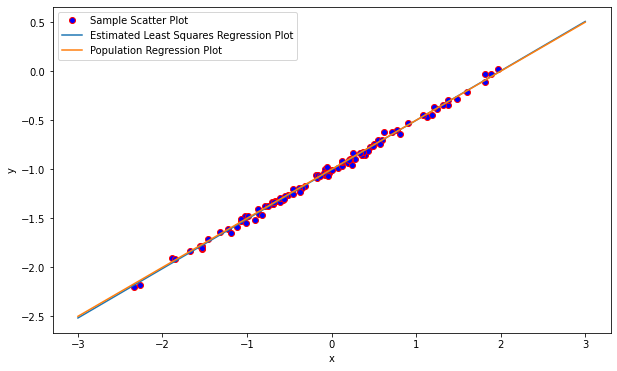

In [39]:
fig,ax = plt.subplots(figsize=(10,6))
_b = ax.plot(x_b,y_b,'or', mfc='b')
_b = ax.set_xlabel("x")
_b = ax.set_ylabel("y")
_b = ax.plot(x_axis_b,y_pred2_b)
_b = ax.plot(x_axis_b,-1+0.5*x_axis_b)
ax.legend(["Sample Scatter Plot","Estimated Least Squares Regression Plot","Population Regression Plot"],loc="upper left")
plt.show()

From the above the R squared value is 0.9966 when the error variance is reduced as expected, below we will redo the above exercise with a higher variance of 0.5 which should fit the regression line further from the population and reduce the R squared value

In [40]:
# question 3.7c lower variance error of 0.50
x_c = np.random.normal(0,1,100)
eps_c = np.random.normal(0,0.5,100)
y_c = -1 + 0.5*x_c + eps_c

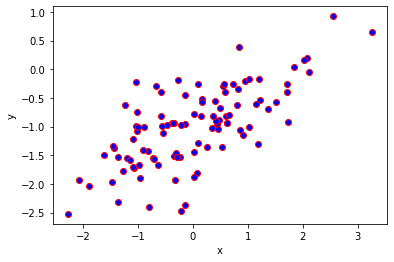

In [41]:
fig,ax = plt.subplots()
_c = ax.plot(x_c,y_c,'or', mfc='b')
_c = ax.set_xlabel("x")
_c = ax.set_ylabel("y")
plt.show()

From the above scatterplot we expect a much lower R^2 value as the error variance has increased.

In [42]:
# Reshape the x and y arrays so we could fit them to the Linear Regression Model in the following question
x2_c = x_c.reshape(-1,1)
y2_c = y_c.reshape(-1,1)

In [43]:
# fit x and y to the Linear Regression Model that we instantiate 
from sklearn.linear_model import LinearRegression

lr_c = LinearRegression()
lr_c.fit(x2_c,y2_c)

beta0_est_c = lr_c.intercept_
beta1_est_c = lr_c.coef_
print("\nR squared score: {}".format(lr.score(x2_c,y2_c)))
print("Beta_0_c estimated: {}, Beta_1_c estimated: {}".format(beta0_est_c,beta1_est_c))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R squared score: 0.4865322648691311
Beta_0_c estimated: [-1.00076586], Beta_1_c estimated: [[0.4463986]]


In [44]:
# Create x-axis values and predicted y-values and reshapen the y array to match the x-axis array for plotting.
x_axis_c = np.linspace(-3,3)
y_pred_c = beta0_est_c+beta1_est_c*x_axis_c
y_pred2_c = y_pred_c.reshape(x_axis_c.shape)

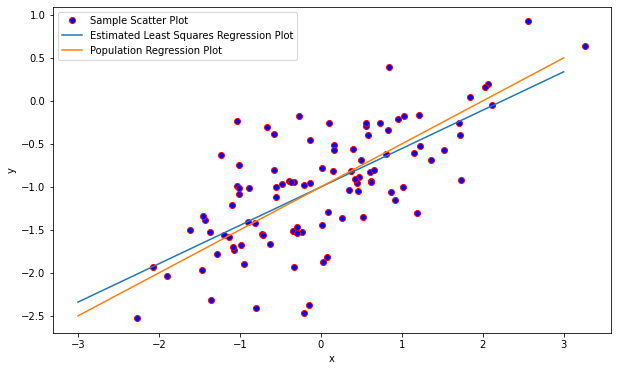

In [45]:
fig,ax = plt.subplots(figsize=(10,6))
_c = ax.plot(x_c,y_c,'or', mfc='b')
_c = ax.set_xlabel("x")
_c = ax.set_ylabel("y")
_c = ax.plot(x_axis_c,y_pred2_c)
_c = ax.plot(x_axis_c,-1+0.5*x_axis_c)
ax.legend(["Sample Scatter Plot","Estimated Least Squares Regression Plot","Population Regression Plot"],loc="upper left")
plt.show()

The above plot shows the fit regression line further from the population regression line. The R squared is also lowered at 0.4865, as predicted.